# Development of Model for Estimate Severity of an Collision Vehicle
### By CristianTY

# Business Problem


Traffic accidents are a very serious problem in society as many human lives are lost or the physical damage generated may carry out a long recovery process. In this sense, the prevention of traffic accidents is a very important issue to consider because it saves lives and also reduces material damage.

According to the data on traffic accidents, the factors that cause the probability of a traffic accident that they cause are diverse. Such as drunkenness, drug use, inattention, excessive speed, weather, road condition, etc. Among the factors there are some that can allow us to determine that in certain areas, under certain physical conditions of the road and weather, it is possible to determine the high probability of a serious traffic accident.

So we main problem is ¿how we can predict the fatality of an accident?

# Data

In [2]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Read the online file by the URL provides above, and assign it to variable "df"
other_path = "Data-Collisions.csv"
df = pd.read_csv(other_path, sep=',', engine='python')  
df.head(10) 

,ï»¿SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [3]:
# Characteristics of data
print("The data has the size: ")
print(df.shape)
print("The data that we have are: ")
print(df.columns)

The data has the size: 
(194673, 38)
The data that we have are: 
Index(['ï»¿SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


Let's consider:
<ol>
    <li>The phisical characteristics of the road</li>
    <li>The weather conditions</li>
    <li>The time of day</li>
    <li>Environment of the road</li> 
</ol> 

We are not considered:
<ol>
    <li>X, Y, LOCATION</li> Because for the same place over the time the conditions of wheater for example or de light can make the rik zero.
    <li>OBJECTID, INCKEY, COLDETKEY, REPORTNO, STATUS, INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, SEVERITYDESC, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR</li> Because they are information that describe the severity of an accident as a consecuence.
    <li>INCDATE</li> Can be used, but this information can be reemplaced with the information of WHEATER, LIGHTCOND. Example, 
we can assume that when winter arrives, the probability of an accident increases, but it would be the same to say that in winter, the weather conditions are mostly foggy or snowy and that the visibility conditions are very low, which increases the probability of an accident. accidentwe can suposed that in spring 
    <li>INCDTTM</li> It can be considered because at certain times such as 3am, the probability of falling asleep while driving increases
    <li>'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING'</li> Although they are factors that increase the probability of an accident, they are factors that cannot be predicted because it is difficult to predict who will be in that state at a certain time and place.
</ol> 

The result data that we are using are:

In [4]:
df2 = df[['ADDRTYPE','SEVERITYCODE','COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND']];
df2.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,Intersection,2,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),Overcast,Wet,Daylight
1,Block,1,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,Block,1,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,Block,1,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,Intersection,2,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),Raining,Wet,Daylight


Next, we are going to preprocessing data, in that sense, we have to
* Indentify and handle missing values
* Correct data format
* Binning

In [5]:
# count missing value in each column 
missing_data = df2.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64



Based on the summary above, each column has 194673 rows of data, six columns containing missing data:
<ol>
    <li>"ADDRTYPE": 1926 missing data</li> 
    <li>"COLLISIONTYPE": 4904 missing data</li> 
    <li>"JUNCTIONTYPE": 6329 missing data</li>
    <li>"WEATHER": 5081 missing data</li>
    <li>"ROADCOND": 5012 missing data</li>
    <li>"LIGHTCOND": 5170 missing data</li>
</ol>

In all missing data, we set the missing as "unknown data"

In [6]:
df2['ADDRTYPE'].replace(np.nan, "Unknown", inplace=True)  
df2['COLLISIONTYPE'].replace(np.nan, "Unknown", inplace=True)  
df2['JUNCTIONTYPE'].replace(np.nan, "Unknown", inplace=True)  
df2['WEATHER'].replace(np.nan, "Unknown", inplace=True)  
df2['ROADCOND'].replace(np.nan, "Unknown", inplace=True)  
df2['LIGHTCOND'].replace(np.nan, "Unknown", inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


We are set the correct format to data

In [7]:
df2.dtypes

ADDRTYPE         object
SEVERITYCODE      int64
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDTTM          object
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

INCDTTM is the time of the accident, so is necessary convert that information to discrete values
* early = 1 morning if hour < 6 and hour > 0
* day = 2 if hour >= 6 and hour <12
* late = 3 if hour >= 12 and hour < 18
* night = 4 if hour < 24 and hour >= 18

In [8]:
data_hour =  pd.to_datetime(df2['INCDTTM']).dt.hour 
data_hour.head()

0    14
1    18
2    10
3     9
4     8
Name: INCDTTM, dtype: int64

In [9]:
data_hour2 = data_hour.apply(lambda x: 1 if (x>=0 and x<6) else( 2 if (x>=6 and x<12) else( 3 if(x>=12 and x<18) else 4)))  
df2['HOUR'] = data_hour2;

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The information shows that it is necessary to convert the object type values ​​to discrete values

In [46]:
df_end = df2[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','HOUR']];
df_end = pd.concat([df_end,pd.get_dummies(df2['ADDRTYPE'])], axis=1)
df_end = pd.concat([df_end,pd.get_dummies(df2['COLLISIONTYPE'])], axis=1) 
df_end = pd.concat([df_end,pd.get_dummies(df2['JUNCTIONTYPE'])], axis=1)
df_end = pd.concat([df_end,pd.get_dummies(df2['WEATHER'])], axis=1)
df_end = pd.concat([df_end,pd.get_dummies(df2['ROADCOND'])], axis=1) 
df_end = pd.concat([df_end,pd.get_dummies(df2['LIGHTCOND'])], axis=1) 
df_end.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HOUR,Alley,Block,Intersection,Unknown,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,2,0,0,2,3,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,2,0,0,2,4,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,4,0,0,3,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,3,0,0,3,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,2,0,0,2,2,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


We see the new columns Unknown and Other. This information is not util

In [47]:
df_end.drop(columns=['Other','Unknown'], inplace = True)
df_end.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HOUR,Alley,Block,Intersection,Angles,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,3,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,4,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,4,0,0,3,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3,0,0,3,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,0,2,2,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0


# Methodology

The severity of an accident adopt discrete values
* 3—fatality
* 2b—serious injury
* 2—injury
* 1—prop damage
* 0—unknown

So, we need to apply a classification method. We have 4 alternatives
* KNN
* Logisitic regresion
* SVM
* Decision Tree

First we study the interrelacion beetween data

#### Relationship beetween severity collision  with address type

The influence of the type of direction (alley, block, intersection) on the severity of an accident is notorious, it is not the same to drive on an alley or on an intersection. In the next figure, we observe more serious traffic accidents in block address type followed in with a great difference of intersection address type. In alley address type the influence of severity accident it's minimal.

In [11]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



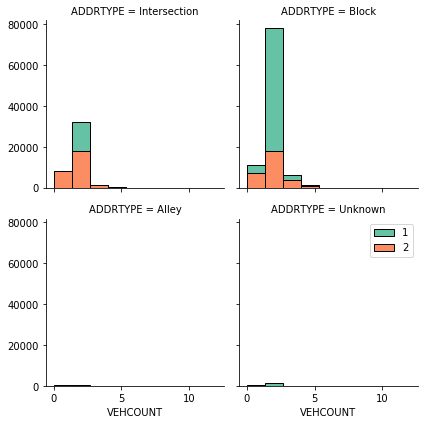

In [48]:
import seaborn as sns

bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Relationship beetween severity collision  with junction type

In the next figure, we observe the strong influence of junction type over severity collision, specifically in 4 types: at mid-block (not related to intersection), intersection, mid-block (but intersection related), driveway, at intersection (but not related to intersection. All of them from highest to lowest degree.

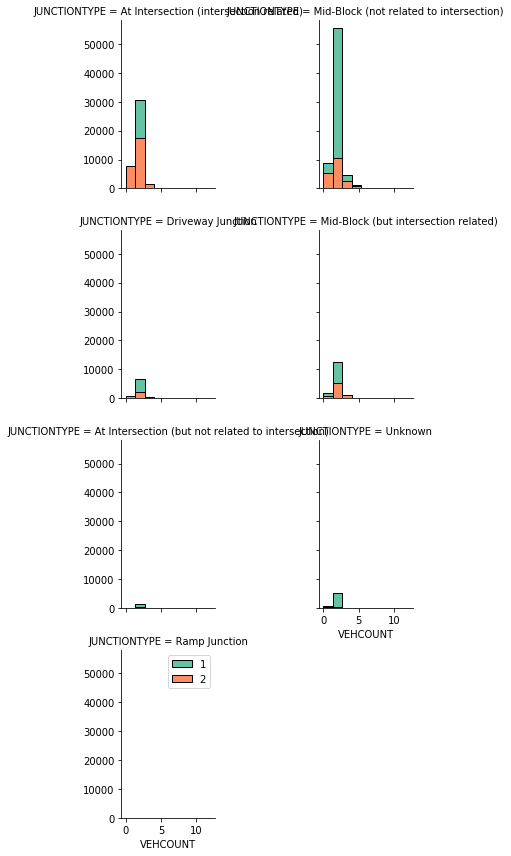

In [49]:
bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="JUNCTIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Relationship beetween severity collision  with junction type

Th result of the next figures show the parker car collision type how is the more type of accident but generate the lower accident. The next more strong influence over the severity accident are: angles, sideswipe, rear ended, left turn, pedrestian, cycles, right turn

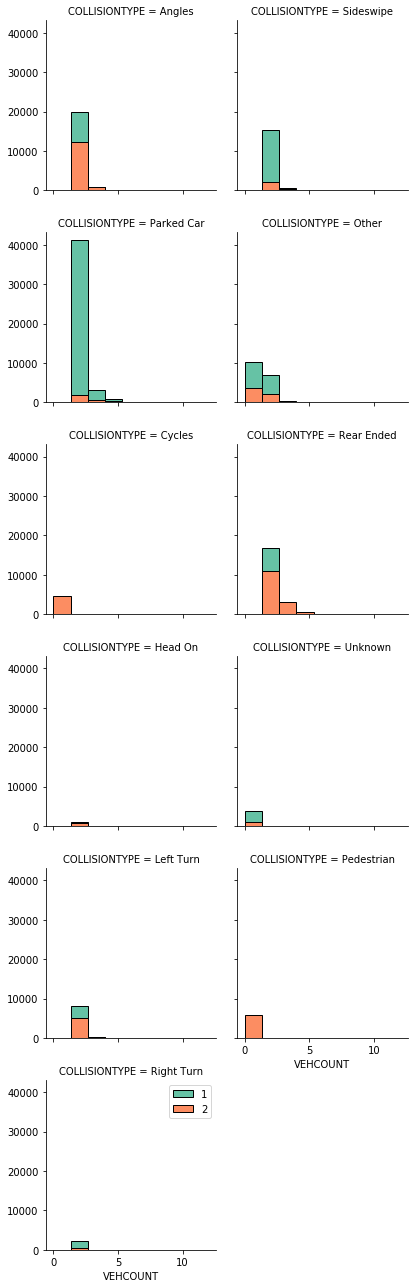

In [50]:
bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Relationship beetween severity collision  with wheater

Contrary to what one might think about the high probability of having an accident when it is raining or in overcast, or snowing, the figures show that there are a greater number of accidents when the day is clear.

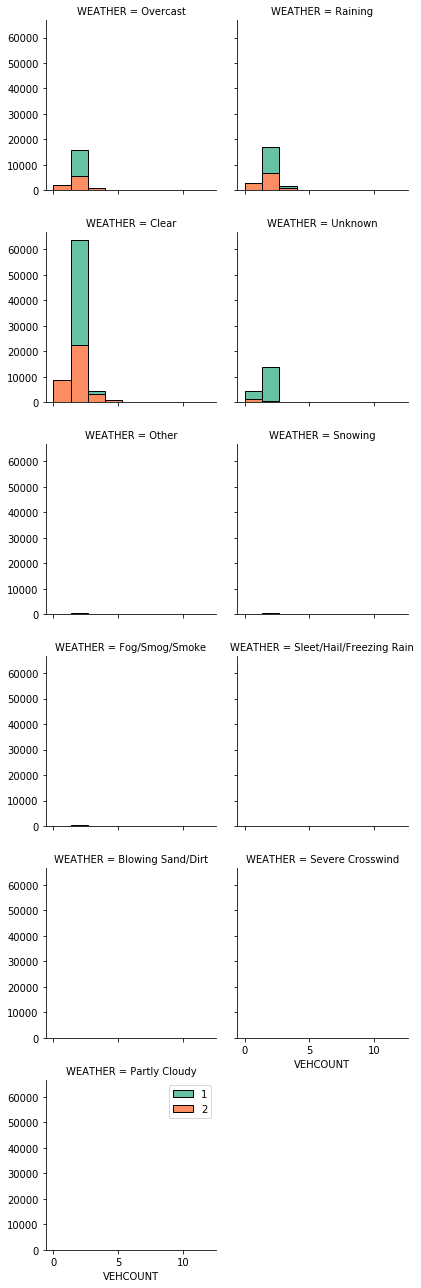

In [51]:
bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="WEATHER", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Relationship beetween severity collision  with roadcond

We noted only two factors to have strong influence over accident: wet and dry

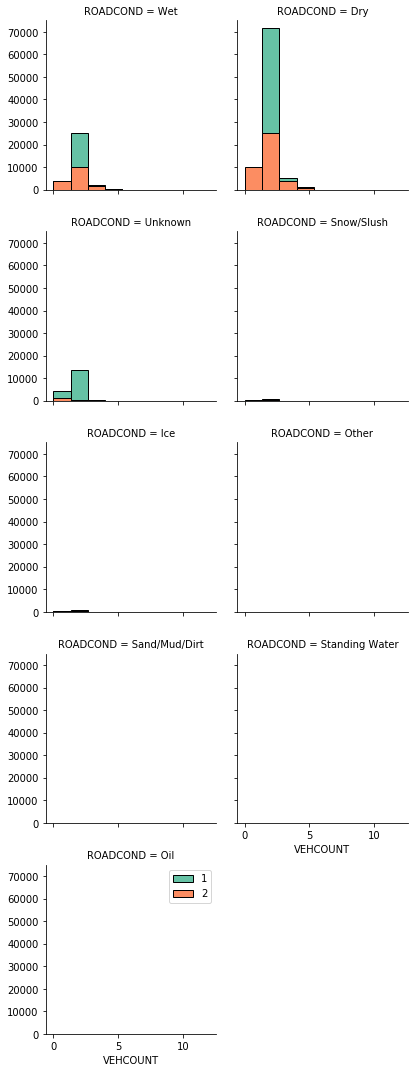

In [52]:
bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="ROADCOND", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Relationship beetween severity collision  with light cond

In the next images, we notes that accident in the night is moree when street light are on

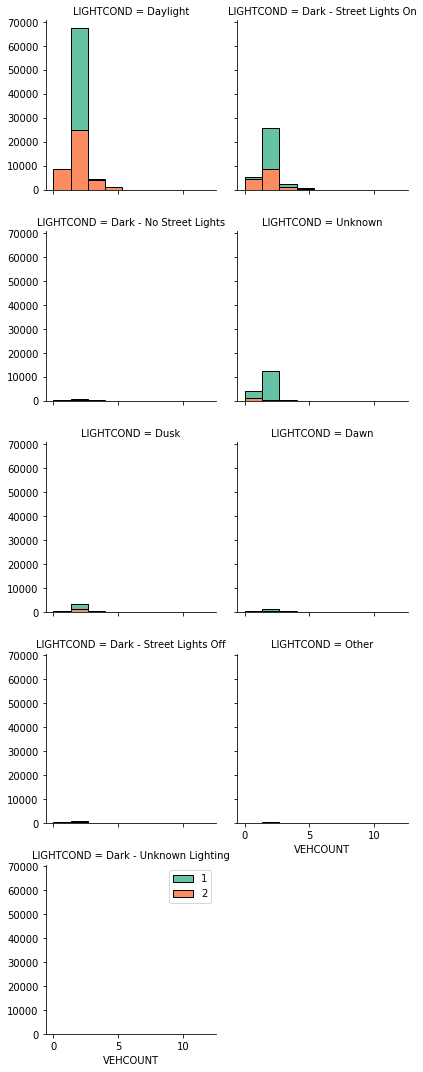

In [53]:
bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Relationship beetween severity collision  with the time of day

There was not much difference between the time of day and the severity of an accident, but it was found that during the afternoon there are more cases of accidents reported. We desestimated this features.

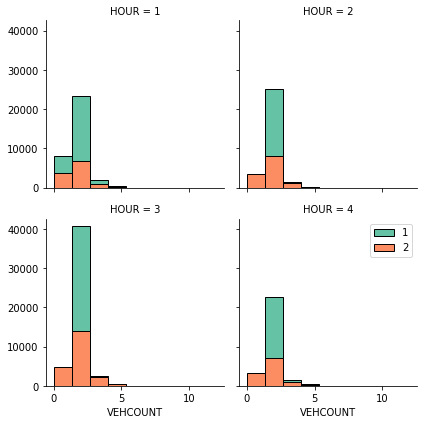

In [54]:
bins = np.linspace(df2.VEHCOUNT.min(), df2.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df2, col="HOUR", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [55]:
df_end.drop(columns=['HOUR'], inplace=True);

#### Applied Methods of Classifications

We have comparede the result using this methods.
* KNN
* Logisitic regresion
* SVM
* Decision Tree

For that we needed to created normalize the data, select the features and label, after create the training and test data

In [56]:
df_end.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'Alley', 'Block', 'Intersection', 'Angles', 'Cycles', 'Head On',
       'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn',
       'Sideswipe', 'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk'],
      dtype='object')

In [62]:
X = df_end[[
       'Alley', 'Block', 'Intersection', 'Angles', 'Cycles', 'Head On',
       'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn',
       'Sideswipe', 'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk']]
X[0:5]

,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [63]:
y = df_end['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [64]:
#normalice data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.06223095, -1.36876932,  1.41129279,  2.14811072, -0.16915004,
        -0.10249953, -0.27517219, -0.57196238, -0.18744809, -0.46074827,
        -0.12417149, -0.32510694, -0.10437651,  1.44892892, -0.2408193 ,
        -0.36412936, -0.92535062, -0.02921369, -0.01696304, -1.15340914,
        -0.05414257,  2.45445634, -0.00506801, -0.45298634, -0.011333  ,
        -0.02409974, -0.06841713, -1.33213439, -0.07905204, -0.01813462,
        -0.01963186, -0.07200071, -0.02431221,  1.76085874, -0.08920831,
        -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,  0.82233559,
        -0.17682024],
       [-0.06223095,  0.73058329, -0.70857019, -0.46552535, -0.16915004,
        -0.10249953, -0.27517219, -0.57196238, -0.18744809, -0.46074827,
        -0.12417149,  3.07591099, -0.10437651, -0.69016498, -0.2408193 ,
        -0.36412936,  1.08067145, -0.02921369, -0.01696304, -1.15340914,
        -0.05414257, -0.4074222 , -0.00506801,  2.2075721 , -0.011333  ,
        -0.02409974, -0.06841

In [80]:
X1 = X[0:50000];
y1 = y[0:50000];
# split the train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.25, random_state=4)

##### Using KNN

In [81]:
# para la evaluacion de la precision
from sklearn import metrics

# Find the best choose of n, first estimate for n different values
from sklearn.neighbors import KNeighborsClassifier 
Ks = 35
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)  
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc  

array([0.65976, 0.71816, 0.7084 , 0.73144, 0.72512, 0.72728, 0.7208 ,
       0.72816, 0.72584, 0.72584, 0.72552, 0.72592, 0.72408, 0.72776,
       0.72448, 0.73096, 0.728  , 0.73136, 0.7308 , 0.732  , 0.7296 ,
       0.73096, 0.73008, 0.73208, 0.73176, 0.73192, 0.73104, 0.73176,
       0.73144, 0.73176, 0.73056, 0.73112, 0.7316 , 0.73216])

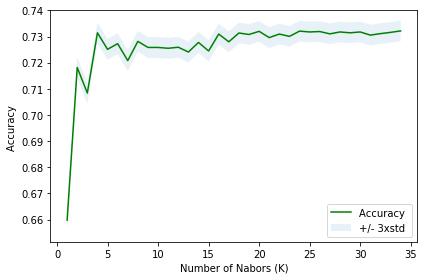

In [82]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [83]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.73216 with k= 34


In [84]:
from sklearn.metrics import f1_score
neigh = KNeighborsClassifier(n_neighbors = 34).fit(X_train,y_train)
yhat_knn = neigh.predict(X_test)
prec_knn = f1_score(y_test, yhat_knn, average='weighted') 

##### Using SVM

In [85]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
yhat_svm = clf.predict(X_test)
yhat_svm [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
prec_svm = f1_score(y_test, yhat_svm, average='weighted') 

##### Using LR

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test) 

In [89]:
from sklearn.metrics import log_loss
prec_lr = f1_score(y_test, yhat, average='weighted')  

##### Using DecisionTree

In [90]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
decTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
from sklearn.metrics import f1_score
predTree = decTree.predict(X_test)
prec_dt = f1_score(y_test, predTree, average='weighted')  

# Results

The performance of the classification model using f1_score is showed in the next table

In [93]:
r = {'knn': [prec_knn], 'svm': [prec_svm], 'linear regresion': [prec_lr], 'decision tree': [prec_dt]}
resultados = pd.DataFrame(data=r)
resultados

,knn,svm,linear regresion,decision tree
0,0.685117,0.670256,0.674835,0.66665


The result show the decision tree graphic

# Discussion 

I can observe for this case that applying the knn method we obtain a greater precision.

I can also observe that decision tree is the method with the most unfavorable results or with less precision.

For the generation of the model because of hardware, I use 10000 rows data.

It was found that for parking lot accidents, the accidents are mostly mild.
It was found that there is a higher probability of having a serious accident when roadcond = dry, also when the wheater = overcast, raining or clear.
If the type of collision is at an angle or rear ended, there is a greater probability of having a serious accident. In an intersection the probability of having a serious accident is also high.

# Conclusion

In this study we analyze the relationship between the severity of an accident and the various factors that most influence the severity of an accident, which will allow us to have a model to estimate where an accident is most likely. I found that accidents in parking lots are mild, that most accidents occur in the afternoon, with a dry track and in block address type. I built a linear regresion model for predict the severity of an trafic accident. This model can be used to alert drivers to be more careful and avoid a traffic accident, thus avoiding material and human losses